In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go 
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits #sklearn은 머신러닝 알고리즘 지원함!
from sklearn.decomposition import PCA

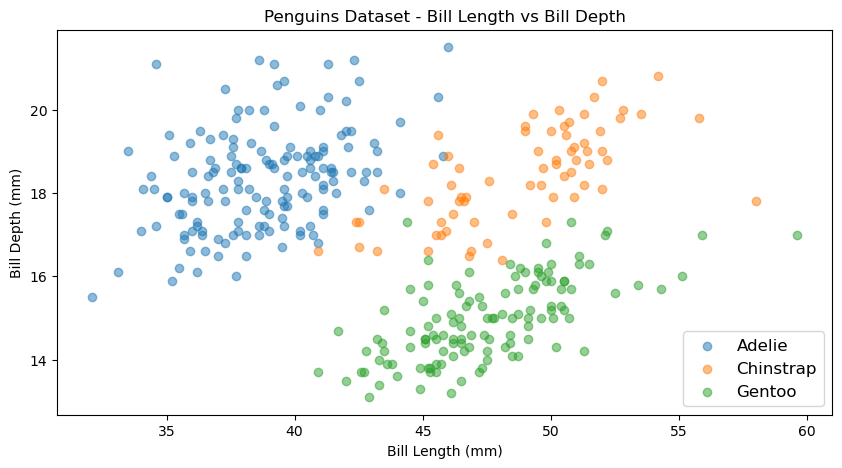

In [25]:
penguins = sns.load_dataset("penguins") #  seaborn의 내장 데이터셋 중 하나인 "penguins" 데이터셋을 로드
fig = plt.figure(figsize = (10,5))  #새로운 Figure 객체를 생성하고, 크기를 10x5
ax = fig.add_subplot(111)  # Figure에 1x1 그리드를 가진 하나의 서브플롯을 추가하고, ax 변수에 할당

species = penguins["species"].unique() # 고유한 종(species) 값을 추출하여 species 변수에 저장

#산포도를 그릴때 범례표시하는 방법 
for s in species:  # 현재 종(s)에 해당하는 펭귄들의 부리 길이와 깊이 값을 추출하여 x와 y 변수에 저장
    x = penguins.loc[penguins["species"] == s , 'bill_length_mm']
    y = penguins.loc[penguins["species"] == s , 'bill_depth_mm']
    ax.scatter(x,y, alpha=0.5 , label=s) # 산포도(scatter plot)를 그림 
    
ax.set_title("Penguins Dataset - Bill Length vs Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend(loc='lower right' , fontsize=12) #범례를 표시 , loc='lower right'는 범례를 그래프의 오른쪽 하단에 위치
plt.show()

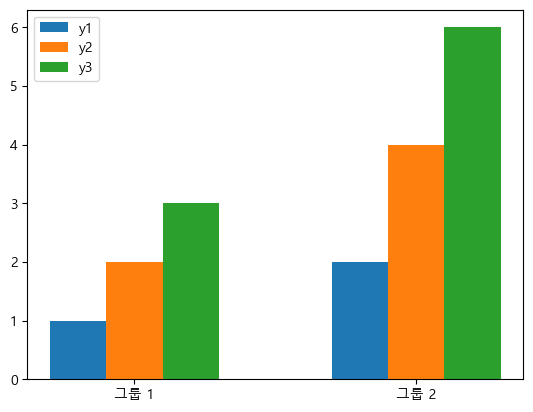

In [37]:

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

x = np.array([1,2])
y1 , y2 , y3 = [[1,2],[2,4],[3,6]]
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2  # w = 0.2는 막대의 너비
ax.bar(x , y1 ,width = w, label ='y1')
ax.bar(x +w , y2 ,width = w, label ='y2')
ax.bar(x +w*2 , y3 ,width = w, label ='y3')

group_positions = np.array(x) + w# 각 그룹의 위치를 계산 . x값에 w를 더하여 각 그룹의 오른쪽 가운데 위치를 계산하고, 
                                 #  x축 눈금의 위치를 group_positions로 설정 
ax.set_xticks(group_positions)    #이를 group_positions 변수에 저장
                                
labels = ["그룹 1", "그룹 2"]
ax.set_xticklabels(labels) # x축 눈금의 레이블을 labels로 설정

ax.legend()
plt.show()

C:\Users\carlo\anaconda3\envs\CW_AI\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


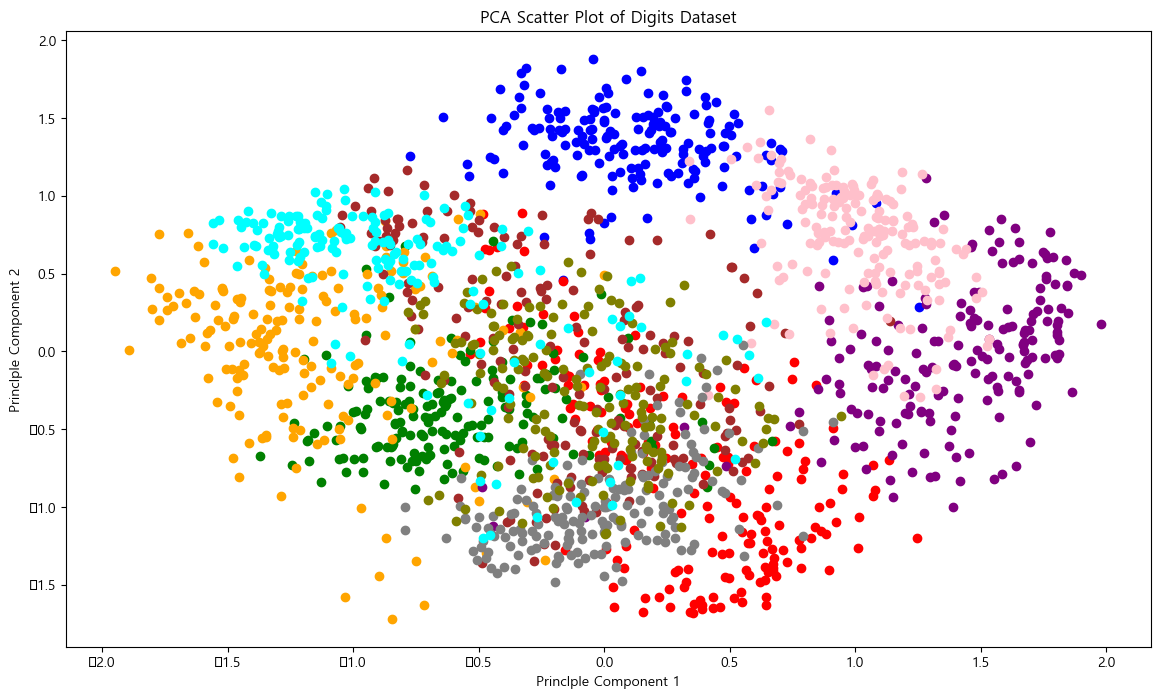

In [66]:
#이미지 데이터를 산포도로 
# 28byte 28bye 특징이 784 개 가로 28 px 세로 28 px 을 한줄로 만들면 784개인데 그게 하나하나 다 특징임.!
digits = load_digits()
# digits.feature_names 

data = digits.data / 16.0 #정규화

pca = PCA(n_components = 2 )
reduced_data = pca.fit_transform(data)
# reduced

fig = plt.figure(figsize = (14,8))
ax = fig.add_subplot(111)

colors = ['blue' , 'red' , 'green' , 'orange' , 'purple' , 
          'brown' , 'pink' , 'gray' , 'olive' , 'cyan']

for i in range(10):
    ax.scatter(reduced_data[digits.target == i , 0],
              reduced_data[digits.target == i , 1],
              color = colors[i],
              label = str(i))

ax.set_title("PCA Scatter Plot of Digits Dataset")
ax.set_xlabel("Princlple Component 1")
ax.set_ylabel("Princlple Component 2")
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_31100\3701590062.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = "age" , palette = "Paired", data = titanic)


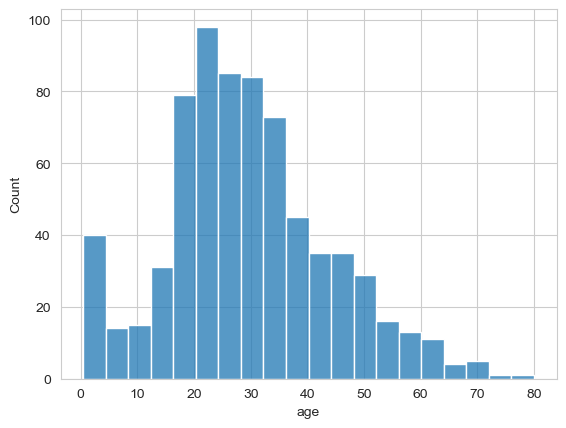

In [97]:
# Seaborn      https://seaborn.pydata.org/examples/index.html 여기서 원하는 모양 만들수있음. 
# 특징 : 맵플롯립 에 비해 그래프가 세련됨, 종류도 많음.
#        맵플롯립 과 호환되므로 함께 사용 할 수 있다.
#        다양한 데이터셋을 지원한다. (load_dataset("불러오고자 하는 데이터셋 이름"))
#        불러온 데이터셋은 모두 데이터프레임 형태이다.

sns.set_style("whitegrid") #darkgrid , whitegrid , dark , white , ticks
titanic = sns.load_dataset("titanic")
 
sns.histplot(x = "age" , palette = "Paired", data = titanic)


plt.show()

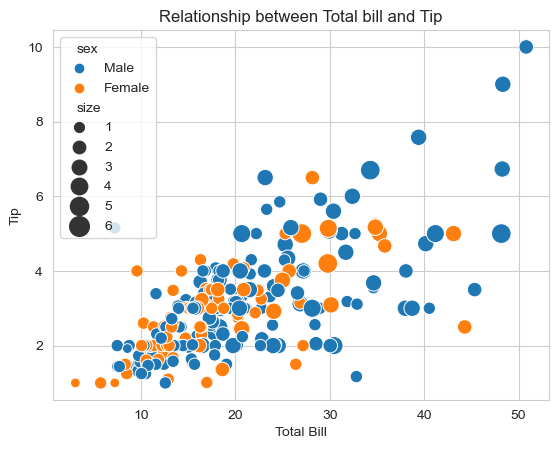

In [98]:
#산점도
#scatterplot() 함수
tips = sns.load_dataset("tips")
# 파라미터
sns.scatterplot(x="total_bill", y="tip" , data =tips, hue="sex" , size="size", sizes=(50,200))
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relationship between Total bill and Tip")
plt.show()

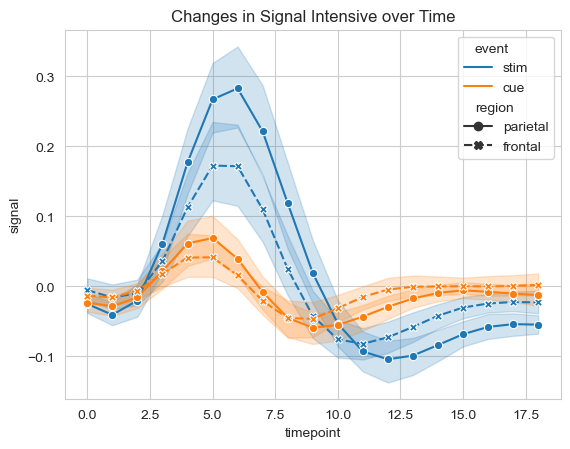

In [108]:
#라인 플롯: lineplot() 함수
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint" , y = "signal" , data=fmri , hue="event" , style="region" , markers=True) 
plt.title("Changes in Signal Intensive over Time")
plt.show()

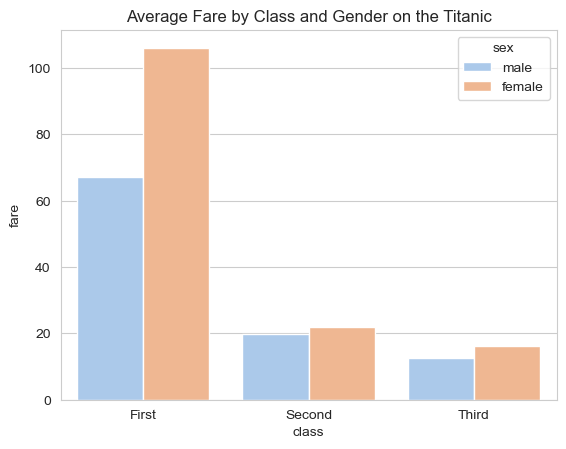

In [125]:
#바 플롯  barplot()함수
titanic = sns.load_dataset("titanic") 
sns.barplot(x="class", y="fare",palette="pastel", data = titanic , errorbar=None, hue="sex")
# errorbar=True 는 바 가운데 짝대기 생김
# palette 종류 deep , crest , pastel , colorblind , muted , husl ,  Set1~3  , tab20b~c
plt.title("Average Fare by Class and Gender on the Titanic")
plt.show()

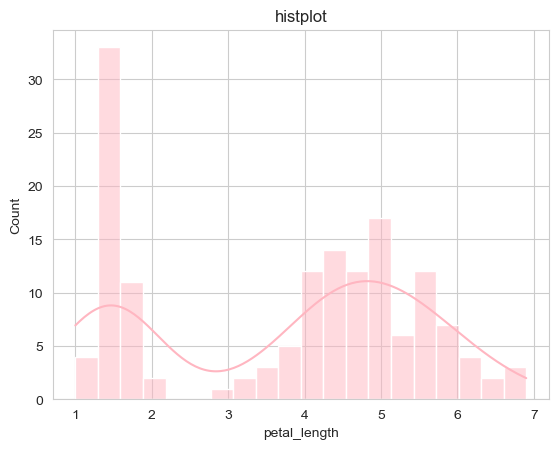

In [146]:
#히스토 그램 histplot() 
iris =sns.load_dataset("iris")
sns.histplot(x="petal_length" , data = iris , bins =20 , color = "lightpink",kde=True)  #bin 바의 개수 조정 , kde = 곡선그려줌 
plt.title("histplot")
plt.show()

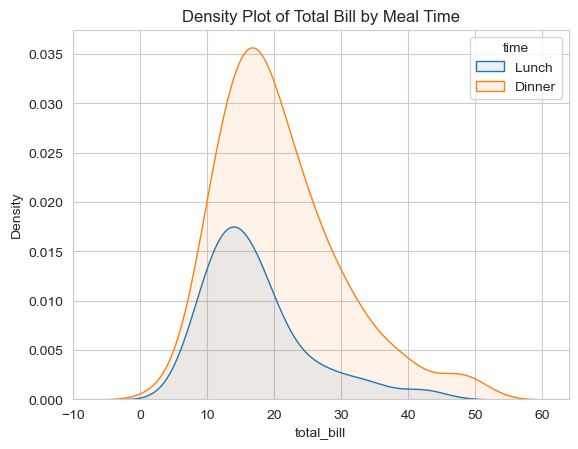

In [155]:
# 커널 밀도 플룻 : kdeplot() 함수
tips = sns.load_dataset("tips")
sns.kdeplot(x = 'total_bill' , data = tips , hue="time" , fill = True , alpha=0.09) #fill 하면 채워줌. 
plt.title("Density Plot of Total Bill by Meal Time")

plt.show()

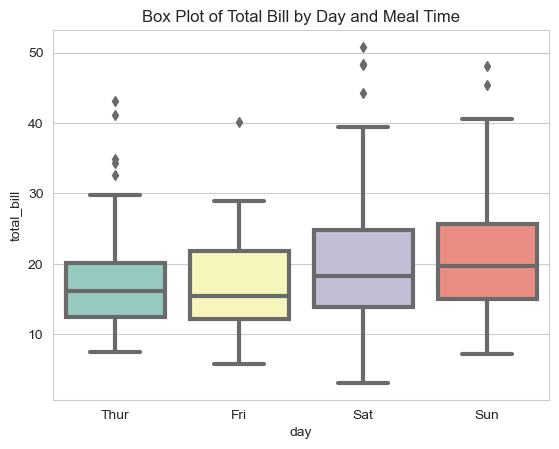

In [174]:
#박스 플롯 : boxplot() 함수
tips = sns.load_dataset('tips')
sns.boxplot(x = 'day' , palette = "Set3",y = 'total_bill' , data = tips , linewidth=3)
plt.title("Box Plot of Total Bill by Day and Meal Time")
plt.show()

<Axes: xlabel='size', ylabel='day'>

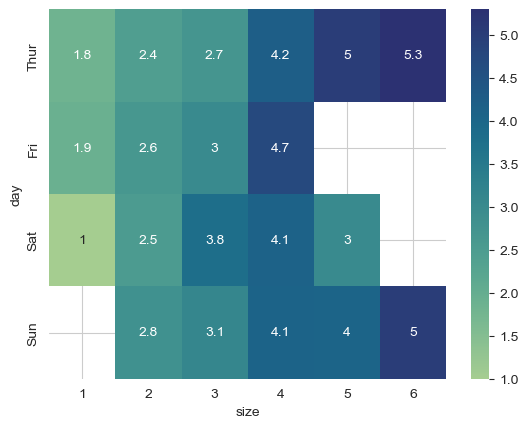

In [178]:
# 히트맵 : Heatmap
tips = sns.load_dataset('tips')
pivot = tips.pivot_table(index = 'day' , columns = 'size' , values = "tip")
sns.heatmap(pivot , cmap ='crest' , annot= True)


C:\Users\carlo\AppData\Local\Temp\ipykernel_31100\3100875835.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr() , annot=True )


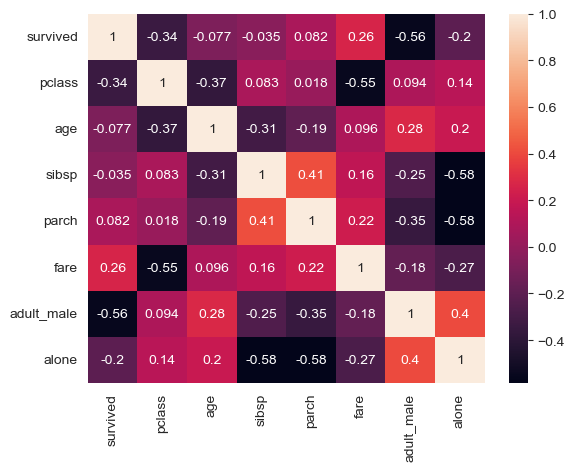

In [183]:
titanic = sns.load_dataset("titanic")
sns.heatmap(titanic.corr() , annot=True )
plt.show()

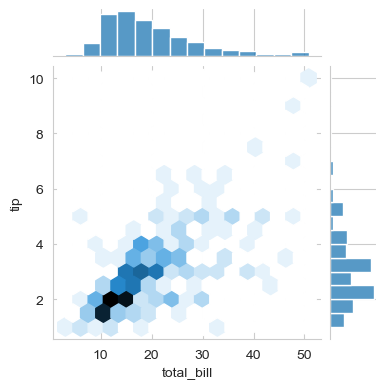

In [203]:
#조인트 플롯 : jointplot()
#산점도와 히스토그램을 결합한 플롯
tip = sns.load_dataset("tips")
sns.jointplot(x = 'total_bill' , y = 'tip' ,height = 4 , data = tips , kind = "hex" )#kind reg -> 선형그래프 추가 , hex -> 산포도
plt.show()                                                                           #     kde   , resid  , hist 

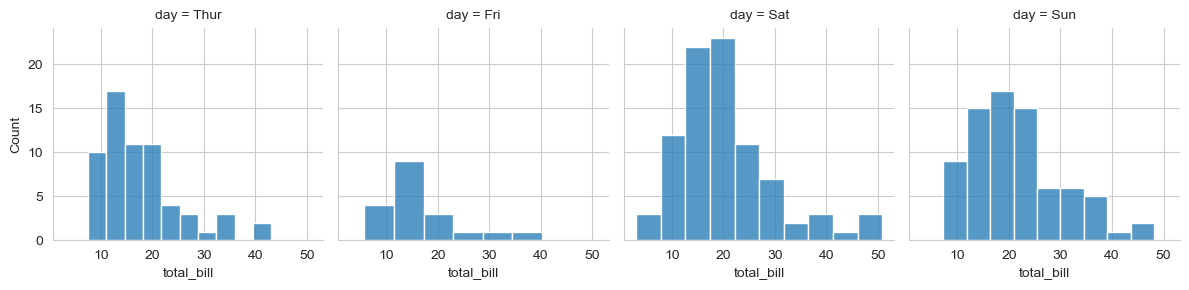

In [212]:
#패싯 그리드 :  FacetGrid()
tips = sns.load_dataset('tips')
g = sns.FacetGrid(tips , col = "day")
g.map(sns.histplot , "total_bill")
plt.show()

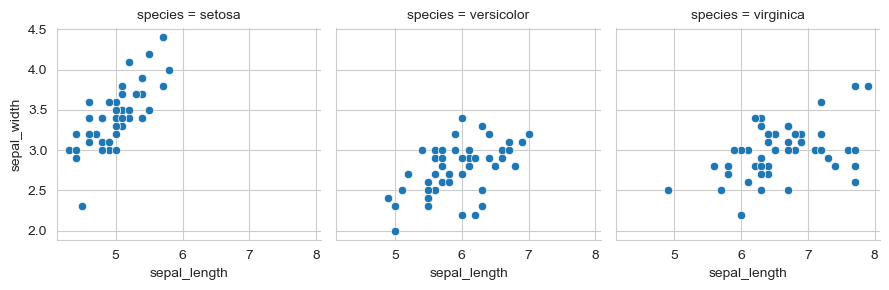

In [214]:
iris = sns.load_dataset('iris')
g = sns.FacetGrid(iris, col='species')
g.map(sns.scatterplot , "sepal_length" , "sepal_width")
plt.show()

In [21]:
#Plotly 상호작용가능한 시각화 라이브러리 


#데이터 생성
x_data =[1,2,3,4,5]
y_data =[1,3,2,4,5]

flights = sns.load_dataset("flights")  
     
#그래프 생성
fig = go.Figure(data = go.Scatter(x = x_data , y = y_data))

#그래프 레이아웃 설정
fig.update_layout(
title = "간단한 선 그래프",
        xaxis_title = "X축" , 
        yaxis_title = "Y축" ,
)

#그래프 표시
fig.show()


In [25]:
flights = sns.load_dataset("flights")  
years = flights.groupby("year")["passengers"].sum()

fig = go.Figure(data = go.Scatter(x = years.index , y = years ))
 
fig.update_layout(
title = "Passenger growing year",
        xaxis_title = "Passenger" , 
        yaxis_title = "Years" ,
) 
fig.show()

In [43]:
#산점도 
x_data =[1,2,3,4,5]
y_data =[1,3,2,4,5]

flights = sns.load_dataset("flights")  
fig = go.Figure(data = go.Scatter(x = x_data ,
                                  y = y_data ,
                                  mode = 'markers' ,
                                  marker = dict(size = 10,
                                                color = "blue",
                                                symbol= "circle"))) #symbol circle , square , star, x , bowtie , asterisk-open
                                                                    #star-triangle-down
fig.update_layout(
title = "산점도",
        xaxis_title = "X축" , 
        yaxis_title = "Y축")
fig.show()

In [80]:
#tips 데이터 셋 로딩 ,total_bill (x축) , tip (Y축) 의 산점도 그리기  
tips = sns.load_dataset("tips") 
flights = sns.load_dataset("flights")  
fig = go.Figure(data = go.Scatter(x = tips["total_bill"] ,
                                  y = tips["tip"] , 
                                  mode = 'markers' ,
                                  marker = dict(size = 10,
                                                color = "red",
                                                symbol= "star-triangle-down")))
fig.update_layout(
    title="total_bill, tip 산점도",
    xaxis_title="X축",
    yaxis_title="Y축",
    width=700, 
    height=400  
) 
fig.show()

In [102]:
#히스토그램 그리기  : Histogram()
sns.set_style("dark")
data = [1,1,2,3,3,4,5,5,6,6,7,8,8,9]
fig = go.Figure(data = go.Histogram(x = data , nbinsx = 20))

fig.update_layout(
    title="Histogram",
    xaxis_title="X축",
    yaxis_title="Y축",
    width=700, 
    height=400  
)  

In [126]:
data = [1,1,2,3,3,4,5,5,6,6,7,8,8,9]
fig = go.Figure(data = go.Histogram(x =  tips["total_bill"]  , nbinsx = 30 , marker=dict(
                                                                                        color = "lightpink",
                                                                                        line = dict(color = "black",
                                                                                                    width = 1) 
                                                                                                    )))

fig.update_layout(
    title="Histogram",
    xaxis_title="X축",
    yaxis_title="Y축", 
    width=700, 
    height=400  
)  

In [123]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
#모닝 문제
flights = sns.load_dataset("flights") 
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


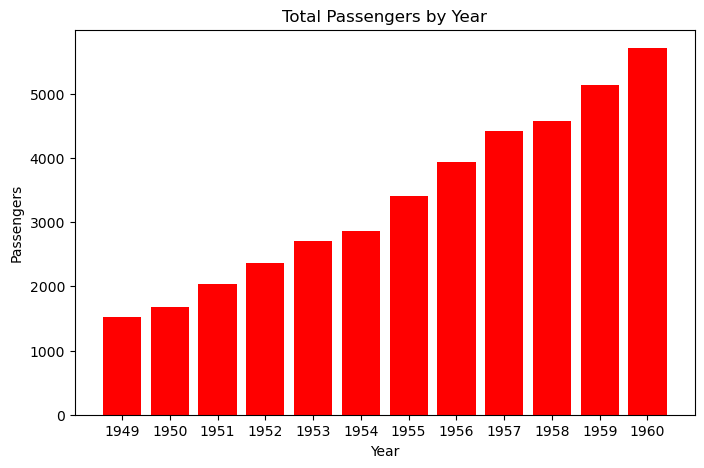

In [4]:
#모닝 문제1
#년도별 승객수를 막대한 그래프로 
flights = sns.load_dataset("flights") 
fig = plt.figure(figsize= (8,5))
ax = fig.add_subplot(111)
    
y = flights.groupby("year")["passengers"].sum() 

x = range(len(y))

xlabels = y.index
ax.bar(x , y, tick_label = xlabels , color="red") 

ax.set_title("Total Passengers by Year")
ax.set_xlabel("Year",fontsize=10)
ax.set_ylabel("Passengers",fontsize=10)
plt.show()

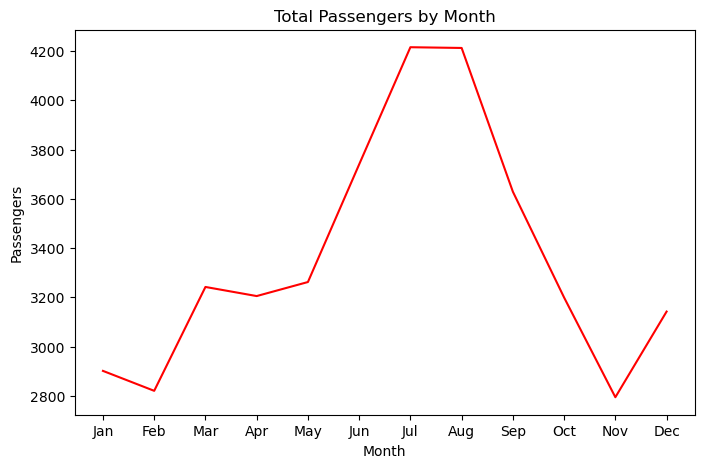

In [17]:
#모닝 문제2
#월별 승객수를 꺽은선으로 
 
flights = sns.load_dataset("flights")  #flight 라는 데이터 셋을 받아오고 
fig = plt.figure(figsize= (8,5))       # 사이즈 8, 5 라는 피겨 생성
ax = fig.add_subplot(111)              # 1 1 1 사이즈의 subplot 생성 그리고 ax에 대입

y = flights.groupby("month")["passengers"].sum()  # flight라는 데이터셋에 "month"안에있는 "passenger" 의 합을 그룹으로 만듬
ax.plot(y.index, y ,color='red') # 그리고 y 를 따로 출력해보면 index위치가 month 니깐 y.index 써주고 , y 는 벨류 , 그리고색은 빨강
                                 # 그렇게 x 축은 month 로 y 축은 passenger 의 합 출력  

ax.set_title("Total Passengers by Month")
ax.set_xlabel("Month",fontsize=10)
ax.set_ylabel("Passengers",fontsize=10)
plt.show()